In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
# if not tf.config.list_physical_devices('GPU'):
#     print('GPU is not detected!!!')
# else:
#     print('GPU detected!!!\n')
#     print('Device type list:')
#     print(device_lib.list_local_devices())
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=['base_date'].copy())
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. lane_count,차로수
6. road_rating,도로등급
7. multi_linked,중용구간 여부
8. connect_code,연결로 코드
9. maximum_speed_limit,최고속도제한
10. weight_restricted,통과제한하중
11. hight_restricted,통과제한높이
12. road_type,도로유형
13. start_latitude,시작지점의 위도
14. start_longitude,시작지점의 경도
15. start_turn_restricted,시작 지점의 회전제한 유무
16. end_latitude,도착지점의 위도
17. end_longitude,도착지점의 경도
18. end_turn_restricted,도작지점의 회전제한 유무
19. road_name,도로명
20. start_node_name,시작지점명
21. end_node_name,도착지점명
22. vehicle_restricted,통과제한차량
23. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [6]:
def date_split(df):

    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
#     df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']

    return df
    
train = date_split(train)
test = date_split(test)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2,59.0,17
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,3,58.0,42
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,4,78.0,14
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,1,48.0,26
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,4,49.0,16
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,1,78.0,4
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2,58.0,44
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,4,78.0,4


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 29 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   id                                object        
 1   base_date                         datetime64[ns]
 2   day_of_week                       object        
 3   base_hour                         int64         
 4   lane_count                        int64         
 5   road_rating                       int64         
 6   road_name                         object        
 7   multi_linked                      int64         
 8   connect_code                      int64         
 9   maximum_speed_limit               float64       
 10  vehicle_restricted                float64       
 11  weight_restricted                 float64       
 12  height_restricted                 float64       
 13  road_type                         int64         
 14  start_node_name   

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

cat_features = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

for i in cat_features:
    label = LabelEncoder()
    train_label[i] = label.fit_transform(train_label[i])
    test_label[i] = label.transform(test_label[i])

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,0.0,32400.0,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4


In [9]:
test_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,TEST_000000,2022-08-25,1,17,3,107,32,0,0,70.0,0.0,0.0,0.0,0,163,33.499427,126.541298,0,403,33.500772,126.543837,1,2022,8,25,3,67.0,51
1,TEST_000001,2022-08-09,6,12,2,103,35,0,0,70.0,0.0,0.0,0.0,3,412,33.258507,126.427003,0,22,33.258119,126.415840,0,2022,8,9,3,68.0,24
2,TEST_000002,2022-08-05,0,2,1,103,36,0,0,60.0,0.0,0.0,0.0,0,97,33.258960,126.476508,0,95,33.259206,126.474687,0,2022,8,5,3,59.0,2
3,TEST_000003,2022-08-18,1,23,3,103,34,0,0,70.0,0.0,0.0,0.0,0,262,33.473494,126.545647,0,350,33.471061,126.545467,0,2022,8,18,3,67.0,69
4,TEST_000004,2022-08-10,2,17,3,106,12,0,0,70.0,0.0,0.0,0.0,0,153,33.501477,126.569223,0,145,33.496863,126.581230,0,2022,8,10,3,67.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,1,103,36,0,0,80.0,0.0,0.0,0.0,0,337,33.472819,126.463030,0,90,33.470483,126.460846,0,2022,8,27,3,79.0,5
291237,TEST_291237,2022-08-19,0,20,2,103,34,0,0,60.0,0.0,0.0,0.0,0,287,33.305359,126.598914,0,451,33.300796,126.600332,0,2022,8,19,3,58.0,40
291238,TEST_291238,2022-08-05,0,11,1,107,23,0,0,30.0,0.0,0.0,0.0,0,119,33.493624,126.496769,1,437,33.497500,126.496946,1,2022,8,5,3,29.0,11
291239,TEST_291239,2022-08-12,0,7,2,107,1,0,0,60.0,0.0,0.0,0.0,0,40,33.254782,126.507014,0,346,33.255659,126.507333,0,2022,8,12,3,58.0,14


In [10]:
corr_matrix = train_label.corr()
corr_matrix['target'].sort_values(ascending=False)

target                              1.000000
maximum_speed_limit - lane_count    0.442913
maximum_speed_limit                 0.425715
weight_restricted                   0.294092
road_type                           0.200840
road_name                           0.116778
connect_code                        0.048348
end_node_name                       0.039770
start_latitude                      0.036280
end_latitude                        0.036139
start_node_name                     0.029007
day_of_week                         0.006397
month                              -0.000225
end_longitude                      -0.001000
start_longitude                    -0.001168
multi_linked                       -0.008408
quarter                            -0.008418
day                                -0.011605
year                               -0.031676
lane_count                         -0.144256
start_turn_restricted              -0.156121
base_hour                          -0.159407
end_turn_r

<AxesSubplot:>

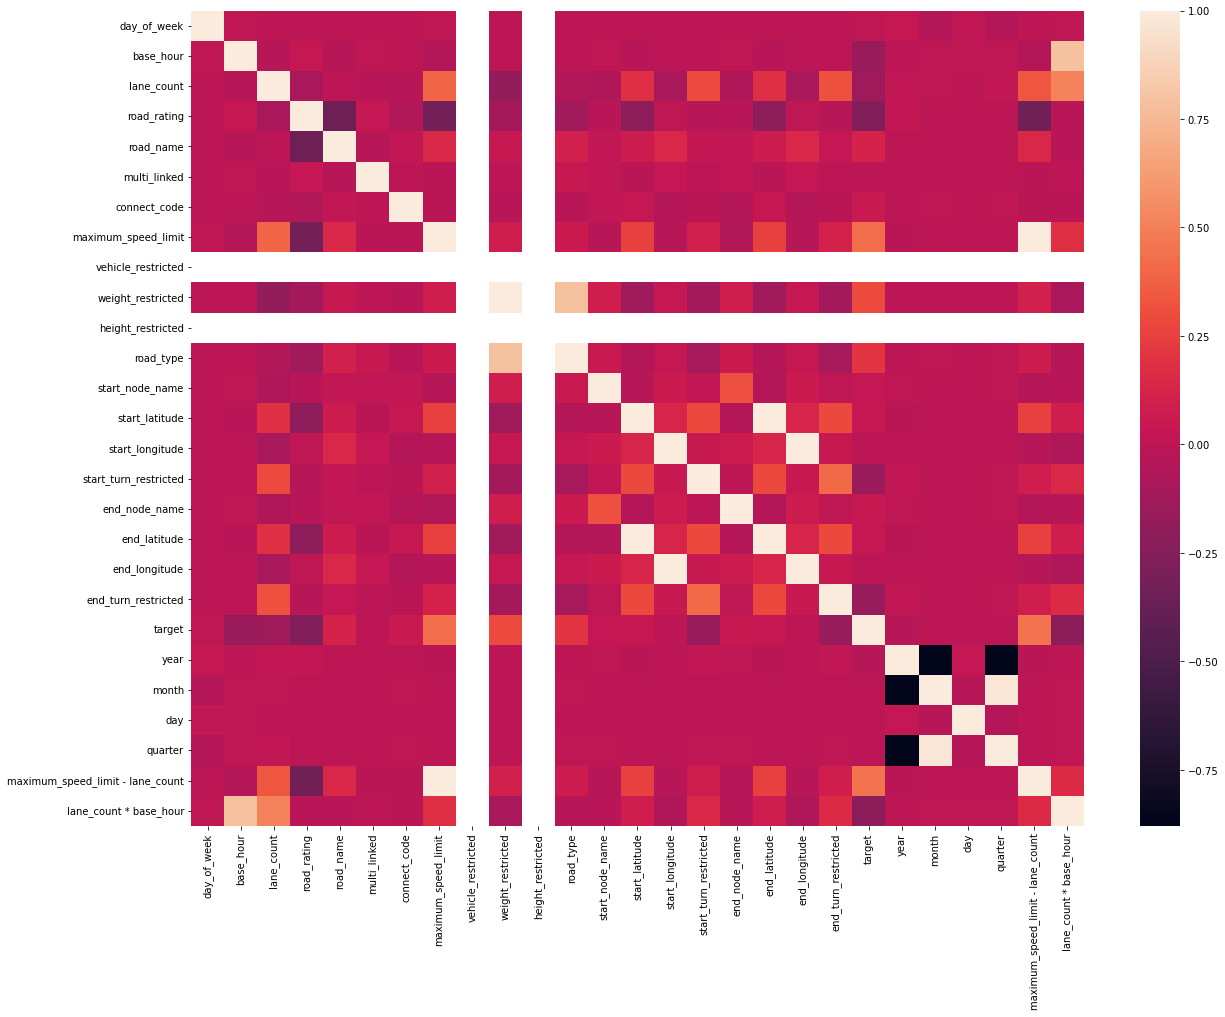

In [11]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [12]:
# see_data = train_label.copy()
# see_test_data = test_label.copy()

In [13]:
# see_data

In [14]:
# see_target_lane_count = see_data.groupby(['maximum_speed_limit', 'road_type', 'lane_count', 'base_hour', 'quarter'])['target'].mean().reset_index()
# see_target_lane_count

In [15]:
# f, ax = plt.subplots(figsize = (20, 15))
# sns.lineplot(data = see_target_lane_count, x = 'base_hour', y = 'target', hue = 'quarter')

In [16]:
# def plot_all(df):
#     f, axes = plt.subplots(2, 2, figsize = (20, 15), sharex = True, sharey = True)
#     f.tight_layout()
#     for n, prod in enumerate(df['quarter'].unique()):
#         plot_df = df.loc[df['quarter'] == prod]
#         sns.lineplot(data = plot_df, x = 'base_hour', y = 'target', hue = 'maximum_speed_limit', style = 'connect_code', ax = axes[n // 2, n% 2])
#         axes[n // 2, n % 2].set_title("quarter: "+ str(prod))

In [17]:
# plot_all(see_data)

In [18]:
X_train_cat = train.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train = train['target'].copy()
X_train_cat

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,2022,6,23,2,59.0,17
1,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,2022,7,28,3,58.0,42
2,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,2021,10,10,4,78.0,14
3,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,2022,3,11,1,48.0,26
4,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,2021,11,4,4,49.0,16
4701213,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,2022,3,31,1,78.0,4
4701214,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,2022,6,13,2,58.0,44
4701215,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,2021,10,20,4,78.0,4


In [19]:
from catboost import CatBoostRegressor
# cat_model = CatBoostRegressor(random_state = 42, iterations = 1500, cat_features = cat_features, early_stopping_rounds = 10, eval_metric = 'MAE')
cat_model = CatBoostRegressor(random_state = 42, cat_features = cat_features, early_stopping_rounds = 10, eval_metric = 'MAE')
cat_model.fit(X_train_cat, y_train, verbose = True)

Learning rate set to 0.155736
0:	learn: 11.6850519	total: 1.42s	remaining: 23m 39s
1:	learn: 10.4490097	total: 2.93s	remaining: 24m 21s
2:	learn: 9.4743511	total: 4.04s	remaining: 22m 21s
3:	learn: 8.7108406	total: 5.23s	remaining: 21m 41s
4:	learn: 8.1320954	total: 6.3s	remaining: 20m 53s
5:	learn: 7.6021266	total: 7.34s	remaining: 20m 16s
6:	learn: 7.1663239	total: 8.37s	remaining: 19m 46s
7:	learn: 6.8470771	total: 9.44s	remaining: 19m 30s
8:	learn: 6.5979392	total: 10.4s	remaining: 19m 10s
9:	learn: 6.4135630	total: 11.4s	remaining: 18m 53s
10:	learn: 6.2619561	total: 12.6s	remaining: 18m 51s
11:	learn: 6.1277386	total: 13.7s	remaining: 18m 44s
12:	learn: 6.0029370	total: 14.6s	remaining: 18m 29s
13:	learn: 5.9033549	total: 15.5s	remaining: 18m 10s
14:	learn: 5.8249587	total: 16.6s	remaining: 18m 8s
15:	learn: 5.7625658	total: 17.3s	remaining: 17m 46s
16:	learn: 5.7048752	total: 18.3s	remaining: 17m 35s
17:	learn: 5.6495244	total: 19.4s	remaining: 17m 36s
18:	learn: 5.6136646	total

153:	learn: 4.4000925	total: 3m 21s	remaining: 18m 27s
154:	learn: 4.3946217	total: 3m 22s	remaining: 18m 25s
155:	learn: 4.3895044	total: 3m 23s	remaining: 18m 22s
156:	learn: 4.3868859	total: 3m 25s	remaining: 18m 21s
157:	learn: 4.3838800	total: 3m 26s	remaining: 18m 22s
158:	learn: 4.3787129	total: 3m 28s	remaining: 18m 20s
159:	learn: 4.3751244	total: 3m 29s	remaining: 18m 20s
160:	learn: 4.3712763	total: 3m 30s	remaining: 18m 19s
161:	learn: 4.3682191	total: 3m 32s	remaining: 18m 18s
162:	learn: 4.3662869	total: 3m 33s	remaining: 18m 17s
163:	learn: 4.3623538	total: 3m 35s	remaining: 18m 17s
164:	learn: 4.3585908	total: 3m 36s	remaining: 18m 16s
165:	learn: 4.3556784	total: 3m 37s	remaining: 18m 15s
166:	learn: 4.3536590	total: 3m 39s	remaining: 18m 14s
167:	learn: 4.3494013	total: 3m 40s	remaining: 18m 13s
168:	learn: 4.3441579	total: 3m 42s	remaining: 18m 14s
169:	learn: 4.3386932	total: 3m 43s	remaining: 18m 13s
170:	learn: 4.3377454	total: 3m 45s	remaining: 18m 12s
171:	learn

304:	learn: 4.0474896	total: 6m 49s	remaining: 15m 33s
305:	learn: 4.0464886	total: 6m 51s	remaining: 15m 32s
306:	learn: 4.0455636	total: 6m 52s	remaining: 15m 31s
307:	learn: 4.0439520	total: 6m 53s	remaining: 15m 29s
308:	learn: 4.0429924	total: 6m 55s	remaining: 15m 28s
309:	learn: 4.0420488	total: 6m 56s	remaining: 15m 27s
310:	learn: 4.0398446	total: 6m 58s	remaining: 15m 26s
311:	learn: 4.0387624	total: 6m 59s	remaining: 15m 25s
312:	learn: 4.0379693	total: 7m	remaining: 15m 22s
313:	learn: 4.0361437	total: 7m 1s	remaining: 15m 21s
314:	learn: 4.0343159	total: 7m 3s	remaining: 15m 19s
315:	learn: 4.0319728	total: 7m 4s	remaining: 15m 18s
316:	learn: 4.0309042	total: 7m 5s	remaining: 15m 17s
317:	learn: 4.0291415	total: 7m 6s	remaining: 15m 15s
318:	learn: 4.0276990	total: 7m 8s	remaining: 15m 14s
319:	learn: 4.0250752	total: 7m 9s	remaining: 15m 13s
320:	learn: 4.0221232	total: 7m 11s	remaining: 15m 12s
321:	learn: 4.0203279	total: 7m 12s	remaining: 15m 10s
322:	learn: 4.0188168

455:	learn: 3.8543536	total: 10m 10s	remaining: 12m 8s
456:	learn: 3.8536197	total: 10m 11s	remaining: 12m 7s
457:	learn: 3.8530008	total: 10m 13s	remaining: 12m 5s
458:	learn: 3.8521438	total: 10m 14s	remaining: 12m 4s
459:	learn: 3.8514434	total: 10m 15s	remaining: 12m 2s
460:	learn: 3.8502382	total: 10m 17s	remaining: 12m 1s
461:	learn: 3.8496469	total: 10m 18s	remaining: 12m
462:	learn: 3.8488100	total: 10m 19s	remaining: 11m 58s
463:	learn: 3.8477536	total: 10m 21s	remaining: 11m 57s
464:	learn: 3.8466872	total: 10m 22s	remaining: 11m 56s
465:	learn: 3.8456950	total: 10m 23s	remaining: 11m 55s
466:	learn: 3.8446822	total: 10m 25s	remaining: 11m 53s
467:	learn: 3.8438573	total: 10m 26s	remaining: 11m 52s
468:	learn: 3.8422431	total: 10m 28s	remaining: 11m 51s
469:	learn: 3.8413633	total: 10m 29s	remaining: 11m 49s
470:	learn: 3.8406075	total: 10m 30s	remaining: 11m 48s
471:	learn: 3.8399756	total: 10m 31s	remaining: 11m 46s
472:	learn: 3.8387899	total: 10m 33s	remaining: 11m 45s
47

604:	learn: 3.7362272	total: 13m 30s	remaining: 8m 49s
605:	learn: 3.7355561	total: 13m 31s	remaining: 8m 47s
606:	learn: 3.7346339	total: 13m 33s	remaining: 8m 46s
607:	learn: 3.7336035	total: 13m 34s	remaining: 8m 45s
608:	learn: 3.7328649	total: 13m 36s	remaining: 8m 43s
609:	learn: 3.7322653	total: 13m 37s	remaining: 8m 42s
610:	learn: 3.7311392	total: 13m 38s	remaining: 8m 41s
611:	learn: 3.7304123	total: 13m 40s	remaining: 8m 39s
612:	learn: 3.7297571	total: 13m 41s	remaining: 8m 38s
613:	learn: 3.7293555	total: 13m 43s	remaining: 8m 37s
614:	learn: 3.7286368	total: 13m 44s	remaining: 8m 36s
615:	learn: 3.7282290	total: 13m 45s	remaining: 8m 34s
616:	learn: 3.7276934	total: 13m 47s	remaining: 8m 33s
617:	learn: 3.7267618	total: 13m 48s	remaining: 8m 32s
618:	learn: 3.7262045	total: 13m 49s	remaining: 8m 30s
619:	learn: 3.7252952	total: 13m 51s	remaining: 8m 29s
620:	learn: 3.7246811	total: 13m 52s	remaining: 8m 28s
621:	learn: 3.7237175	total: 13m 53s	remaining: 8m 26s
622:	learn

755:	learn: 3.6526828	total: 16m 51s	remaining: 5m 26s
756:	learn: 3.6523165	total: 16m 53s	remaining: 5m 25s
757:	learn: 3.6519597	total: 16m 54s	remaining: 5m 23s
758:	learn: 3.6514377	total: 16m 55s	remaining: 5m 22s
759:	learn: 3.6510519	total: 16m 57s	remaining: 5m 21s
760:	learn: 3.6506596	total: 16m 58s	remaining: 5m 19s
761:	learn: 3.6504807	total: 16m 59s	remaining: 5m 18s
762:	learn: 3.6500515	total: 17m	remaining: 5m 17s
763:	learn: 3.6496438	total: 17m 2s	remaining: 5m 15s
764:	learn: 3.6491576	total: 17m 3s	remaining: 5m 14s
765:	learn: 3.6485882	total: 17m 4s	remaining: 5m 13s
766:	learn: 3.6482367	total: 17m 5s	remaining: 5m 11s
767:	learn: 3.6478732	total: 17m 7s	remaining: 5m 10s
768:	learn: 3.6472929	total: 17m 8s	remaining: 5m 8s
769:	learn: 3.6468321	total: 17m 10s	remaining: 5m 7s
770:	learn: 3.6466149	total: 17m 11s	remaining: 5m 6s
771:	learn: 3.6459173	total: 17m 12s	remaining: 5m 5s
772:	learn: 3.6453940	total: 17m 14s	remaining: 5m 3s
773:	learn: 3.6449082	tot

906:	learn: 3.5879410	total: 20m 13s	remaining: 2m 4s
907:	learn: 3.5875378	total: 20m 14s	remaining: 2m 3s
908:	learn: 3.5873525	total: 20m 16s	remaining: 2m 1s
909:	learn: 3.5870377	total: 20m 17s	remaining: 2m
910:	learn: 3.5863594	total: 20m 18s	remaining: 1m 59s
911:	learn: 3.5859481	total: 20m 20s	remaining: 1m 57s
912:	learn: 3.5851215	total: 20m 21s	remaining: 1m 56s
913:	learn: 3.5846704	total: 20m 22s	remaining: 1m 55s
914:	learn: 3.5845004	total: 20m 23s	remaining: 1m 53s
915:	learn: 3.5840992	total: 20m 25s	remaining: 1m 52s
916:	learn: 3.5837949	total: 20m 26s	remaining: 1m 50s
917:	learn: 3.5833192	total: 20m 27s	remaining: 1m 49s
918:	learn: 3.5829148	total: 20m 28s	remaining: 1m 48s
919:	learn: 3.5825354	total: 20m 30s	remaining: 1m 46s
920:	learn: 3.5822308	total: 20m 31s	remaining: 1m 45s
921:	learn: 3.5820715	total: 20m 32s	remaining: 1m 44s
922:	learn: 3.5818363	total: 20m 33s	remaining: 1m 42s
923:	learn: 3.5815019	total: 20m 35s	remaining: 1m 41s
924:	learn: 3.581

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour
0,1,17,1,106,46,0,0,60.0,32400.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17
1,1,21,2,103,34,0,0,60.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42
2,4,7,2,103,36,0,0,80.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14
3,0,13,2,107,57,0,0,50.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26
4,6,8,2,103,35,0,0,80.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,0,0,50.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16
4701213,1,2,2,107,0,0,0,80.0,43200.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1,78.0,4
4701214,3,22,2,103,35,0,0,60.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2,58.0,44
4701215,2,2,2,103,37,0,0,80.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4,78.0,4


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# test_xgb = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
# X_train_scaler = scaler.fit_transform(X_train_label)
# test_xgb = scaler.transform(test_xgb)
test_label = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)

In [22]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train_label, y_train_label, test_size=0.2, random_state = 42)

In [23]:
xgb_model = XGBRegressor(random_state = 42, tree_method = 'gpu_hist', alpha = 0,
                  min_child_weight = 2, subsample = 0.9, colsample_bytree = 0.9,
                  max_depth = 10, eval_metric = 'mae')
    
xgb_model.fit(X_train_label, y_train_label)

XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [24]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(random_state = 42)
lgbm_model.fit(X_train_label, y_train_label)

LGBMRegressor(random_state=42)

In [25]:
pred_xgb = xgb_model.predict(test_label)

In [26]:
pred_xgb

array([25.003265, 44.167385, 66.28914 , ..., 22.975176, 23.33087 ,
       46.044456], dtype=float32)

In [27]:
pred_cat = cat_model.predict(test_label)
pred_cat

array([21.74633233, 44.96752821, 43.11262296, ..., 20.2225496 ,
       28.19076472, 29.49030421])

In [32]:
pred_lgbm = lgbm_model.predict(test_label)
pred_lgbm

array([25.97609   , 45.16863833, 59.05737512, ..., 21.77797583,
       25.16426489, 39.16279218])

In [33]:
pred = pd.DataFrame({'xgb_pred' : pred_xgb, 'cat_pred' : pred_cat, 'lgbm_pred' : pred_lgbm})
pred

,xgb_pred,cat_pred,lgbm_pred
0,25.003265,21.746332,25.976090
1,44.167385,44.967528,45.168638
2,66.289139,43.112623,59.057375
3,38.751106,38.275000,37.247367
4,43.425991,29.029301,39.049547
...,...,...,...
291236,48.300938,47.265767,53.365651
291237,51.276367,35.235895,52.293175
291238,22.975176,20.222550,21.777976
291239,23.330870,28.190765,25.164265


In [35]:
pred['pred_all'] = (pred['xgb_pred'] + pred['cat_pred'] + pred['lgbm_pred']) / 3
pred

,xgb_pred,cat_pred,lgbm_pred,pred_all
0,25.003265,21.746332,25.976090,24.241896
1,44.167385,44.967528,45.168638,44.767851
2,66.289139,43.112623,59.057375,56.153046
3,38.751106,38.275000,37.247367,38.091158
4,43.425991,29.029301,39.049547,37.168280
...,...,...,...,...
291236,48.300938,47.265767,53.365651,49.644119
291237,51.276367,35.235895,52.293175,46.268479
291238,22.975176,20.222550,21.777976,21.658567
291239,23.330870,28.190765,25.164265,25.561966


In [30]:
# feature_importance = xgb.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(20, 15))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(test_xgb.columns)[sorted_idx])
# plt.title('Feature Importance')

In [36]:
output = pd.DataFrame({'id' : test.id, 'target':pred['pred_all']})
output.to_csv('stacking.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
